<a href="https://colab.research.google.com/github/gauravkumar950/AI-Diesease-Detection/blob/main/Plant_Disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"gaurav620","key":"847b85abe55005586fa216e92625b8d8"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [ ]:
!kaggle datasets download -d vipoooool/new-plant-diseases-dataset
!unzip new-plant-diseases-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/273a7a9e-18be-4b6a-976a-fa5ffd69b731___RS_HL 4366_90deg.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/275f8963-f4f4-4903-962b-1da716725d08___RS_HL 4780_90deg.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/275f8963-f4f4-4903-962b-1da716725d08___RS_HL 4780_new30degFlipLR.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/27c2aaa4-de4b-4fb1-ba8d-14d4b24b2afa___RS_HL 4665.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/27c2aaa4-de4b-4fb1-ba8d-14d4b24b2afa___RS_HL 4665_270deg.JPG  
  inflating: new plant diseases dataset(augmented)/New 

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os
import numpy as np
%matplotlib inline

In [ ]:
data_dir = "New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)"
train_dir = data_dir + "/train"
valid_dir = data_dir + "/valid"
diseases = os.listdir(train_dir)

In [ ]:
print(len(diseases))
print(diseases)

38
['Peach___healthy', 'Strawberry___Leaf_scorch', 'Corn_(maize)___Common_rust_', 'Tomato___healthy', 'Grape___Black_rot', 'Cherry_(including_sour)___healthy', 'Blueberry___healthy', 'Corn_(maize)___healthy', 'Raspberry___healthy', 'Tomato___Bacterial_spot', 'Potato___Late_blight', 'Tomato___Leaf_Mold', 'Pepper,_bell___Bacterial_spot', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Tomato___Tomato_mosaic_virus', 'Potato___Early_blight', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Tomato___Late_blight', 'Apple___Apple_scab', 'Apple___Cedar_apple_rust', 'Pepper,_bell___healthy', 'Grape___Esca_(Black_Measles)', 'Squash___Powdery_mildew', 'Apple___healthy', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Peach___Bacterial_spot', 'Corn_(maize)___Northern_Leaf_Blight', 'Tomato___Early_blight', 'Cherry_(including_sour)___Powdery_mildew', 'Apple___Black_rot', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Soybean___healthy

In [ ]:
training_set = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    labels="inferred",           # Automatically infer labels from directory names
    label_mode="categorical",    # Use categorical mode for multi-class classification
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),       # Resize images to 128x128 pixels
    shuffle=True,                # Shuffle the data
    seed=None,                   # Optionally set a seed for reproducibility
    validation_split=None,       # Not splitting here since it's for the training set
    subset=None,                 # Specify if splitting into training/validation
    interpolation="bilinear",    # Interpolation method for resizing images
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 70295 files belonging to 38 classes.


In [ ]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    valid_dir,
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


In [ ]:
class_name = validation_set.class_names
print(class_name)

['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Sp

In [ ]:
import os

# Check if the file exists at the specified path
if os.path.exists("/content/trained_plant_disease_model.keras"):
    print("File found.")
else:
    print("File not found.")


File found.


In [ ]:
cnn = tf.keras.models.load_model("/content/drive/MyDrive/trained_plant_disease_model.keras")


In [ ]:
#Training set Accuracy
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

# Training accuracy: 0.9781919121742249
#Validation set Accuracy
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

2197/2197 ━━━━━━━━━━━━━━━━━━━━ 62s 26ms/step - accuracy: 0.9901 - loss: 0.0308
Training accuracy: 0.9901273250579834
550/550 ━━━━━━━━━━━━━━━━━━━━ 16s 29ms/step - accuracy: 0.9665 - loss: 0.1100
Validation accuracy: 0.9658547639846802


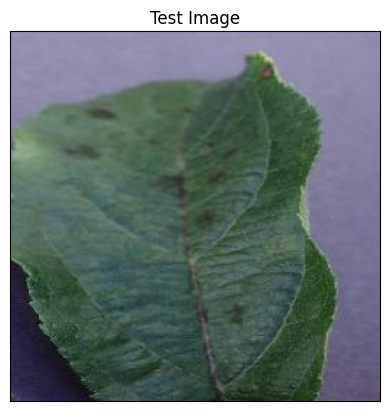

In [ ]:
#Test Image Visualization
import cv2
image_path = '/content/Apple_Apple_scab1.JPG'
# Reading an image in default mode
img = cv2.imread(image_path)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) #Converting BGR to RGB
# Displaying the image
plt.imshow(img)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
plt.show()

In [ ]:
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(128,128))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
predictions = cnn.predict(input_arr)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


In [ ]:
print(predictions.size)
print(predictions)

38
[[9.9996257e-01 4.1407563e-07 4.6149441e-07 2.9789189e-05 1.8562201e-08
  1.2881097e-07 5.4221788e-10 3.3441163e-06 3.7546556e-08 1.7368134e-08
  8.4890911e-10 1.7353729e-08 4.4201580e-09 1.9624689e-10 1.5377375e-07
  1.5911713e-08 7.0351874e-08 2.0786894e-08 1.3075144e-08 3.1675256e-08
  9.4234412e-07 8.0269962e-07 6.6476836e-08 3.7228901e-10 3.7614134e-09
  5.2023120e-07 1.4238839e-08 2.8208959e-08 4.5346127e-09 2.4060707e-08
  2.4319871e-08 5.9364723e-08 5.7411317e-08 1.3890160e-10 3.0759020e-07
  1.0231633e-10 2.8932523e-10 1.5833361e-08]]


In [ ]:
result_index = np.argmax(predictions) #Return index of max element
print(result_index)

# Displaying the disease prediction
model_prediction = class_name[result_index]
print(model_prediction.split('___'))

0
['Apple', 'Apple_scab']
